In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as opt
import scipy.io

import os

%matplotlib inline

## Part 1 - Regularized Linear Regression

### 1.1 Visualizing the dataset

In [2]:
# Read the data
FOLDER = 'data'
FILE = 'ex5data1.mat'
path = os.path.join(FOLDER, FILE)

data = scipy.io.loadmat(path)

X = data['X']
Y = data['y'].flatten()
print("X is of dimensions {0}".format(X.shape))
print("y is of dimensions {0}".format(Y.shape))
Xval = data['Xval']
Yval = data['yval'].flatten()
print("Xval is of dimensions {0}".format(Xval.shape))
print("yval is of dimensions {0}".format(Yval.shape))
Xtest = data['Xtest']
Ytest = data['ytest'].flatten()
print("Xtest is of dimensions {0}".format(Xtest.shape))
print("Ytest is of dimensions {0}".format(Ytest.shape))

X is of dimensions (12, 1)
y is of dimensions (12,)
Xval is of dimensions (21, 1)
yval is of dimensions (21,)
Xtest is of dimensions (21, 1)
Ytest is of dimensions (21,)


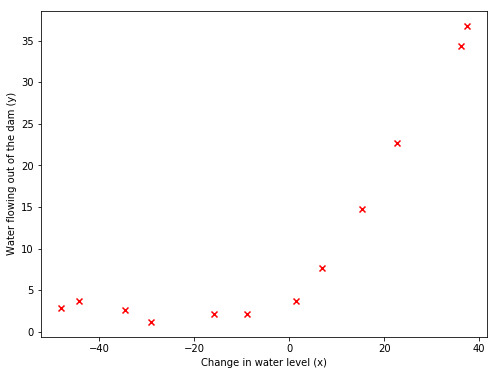

In [3]:
plt.figure(figsize = (8,6))
plt.scatter(X,
            Y,
            marker = 'x',
            color = 'red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### 1.2 Regularized linear regression cost function

Regularized linear regression has the following cost function: $$ J(\theta) = \frac{1}{2m} \left ( \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \right ) + \frac{\lambda}{2m} \left ( \sum_{j=1}^n \theta_j^2 \right ) $$ where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well.

In [4]:
class linearRegression:
    def __init__(self, theta):
        self.theta = theta
        
    def get_theta(self):
        return self.theta
    
    def set_theta(self, theta):
        self.theta = theta
        
    def augment_x(self, x):
        return np.hstack((np.ones((x.shape[0],1)),x))
    
    def hypothesis(self, x):
        '''
        x is of dimensions (num_of_examples, num_of_features)
        theta is of dimensions (num_of_features + bias, 1)
        '''
        assert self.theta.shape[0] == x.shape[1] + 1, "Theta and X shape mismatch"
        x_aug = self.augment_x(x)
        hyp = np.dot(x_aug, self.theta)
        return hyp
    
    def regularize(self, x, l = 0):
        '''
        l is the regularization parameter
        '''
        m = x.shape[0] # the number of training examples
        reg = np.sum(np.power(self.theta[1:],2)) * l / (2*m)
        return reg
    
    def cost_function(self, x, y, l = 0):
        m = x.shape[0]
        J = np.sum(np.power(self.hypothesis(x) - y,2)) / (2*m) + self.regularize(x, l)
        return J

In [5]:
cls = linearRegression(np.ones(2))
cls.cost_function(X, Y, 1)

303.9931922202643

### 1.3 Regularized linear regression gradient

The partial derivative of regularized linear regression's cost for $\theta_j$ is defined as 
\begin{align*}  
&\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} &\text{for j = 0} \\ 
&\frac{\partial J(\theta)}{\partial \theta_j} = \left ( \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right ) + \frac{\lambda}{m}\theta_j 
&\text{for j $\ge$ 1}
\end{align*}

In [6]:
def gradient(self, x, y, l = 0):
    m = x.shape[0]
    grad = np.dot( self.augment_x(x).T ,(self.hypothesis(x) - y) ) / m
    grad[1:] += l * self.theta[1:] / m
    return grad

linearRegression.gradient = gradient

In [7]:
cls = linearRegression(np.ones(2))
cls.gradient(X, Y, 1)

array([-15.30301567, 598.25074417])

### 1.4 Fitting linear regression

In [8]:
class linearRegression:
    def __init__(self):
        pass
    
    '''
    def get_theta(self):
        return self.theta
    
    def set_theta(self, theta):
        self.theta = theta
    '''
    
    def augment_x(self, x):
        return np.hstack((np.ones((x.shape[0],1)),x))
    
    def hypothesis(self, theta, x):
        '''
        x is of dimensions (num_of_examples, num_of_features)
        theta is of dimensions (num_of_features + bias, 1)
        '''
        assert theta.shape[0] == x.shape[1] + 1, "Theta and X shape mismatch"
        x_aug = self.augment_x(x)
        hyp = np.dot(x_aug, theta)
        return hyp
    
    def regularize(self, theta, x, l = 0):
        '''
        l is the regularization parameter
        '''
        m = x.shape[0] # the number of training examples
        reg = np.sum(np.power(theta[1:],2)) * l / (2*m)
        return reg
    
    def cost_function(self, theta, x, y, l = 0):
        m = x.shape[0]
        J = np.sum(np.power(self.hypothesis(theta, x) - y,2)) / (2*m) + self.regularize(theta, x, l)
        return J

    def gradient(self, theta, x, y, l = 0):
        m = x.shape[0]
        grad = np.dot( self.augment_x(x).T ,(self.hypothesis(theta, x) - y) ) / m
        grad[1:] += l * theta[1:] / m
        return grad

    def fit(self, theta, x, y, l = 0):
        opt_theta = opt.fmin_cg(self.cost_function, theta, fprime = self.gradient, args=(x, y, l))
        return opt_theta

In [9]:
cls = linearRegression()
opt_theta = cls.fit(theta = np.ones(2), x = X, y = Y, l = 1)

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


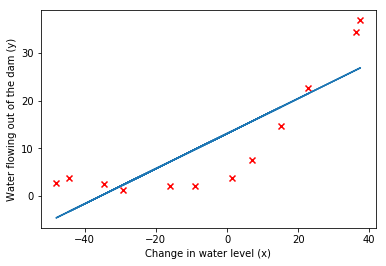

In [10]:
plt.scatter(X,Y,marker = 'x', color = 'red')
plt.plot(X, cls.hypothesis(opt_theta, X))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## Part 2 - Bias-variance

### 2.1 Learning curves

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.098522
         Iterations: 4
         Function evaluations: 8
         Grad

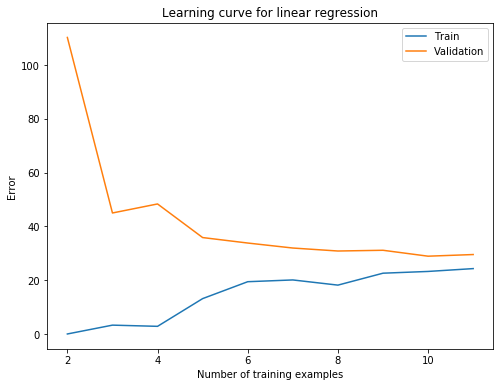

In [11]:
cls = linearRegression()
cost_data = []
l = 0
for i in range(2,X.shape[0]):
    subx = X[:i]
    suby = Y[:i]
    opt_theta = cls.fit(np.ones(2), subx, suby, l)
    cost_train = cls.cost_function(opt_theta, subx, suby, l)
    cost_val = cls.cost_function(opt_theta, Xval, Yval, l)
    cost_data.append((i, cost_train, cost_val))
i, train, cv = zip(*cost_data)

plt.figure(figsize = (8,6))
plt.plot(i, train, label = "Train")
plt.plot(i, cv, label = "Validation")
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Learning curve for linear regression')
plt.legend()
plt.show()

## Part 3 - Polynomial regression

In [12]:
def poly_features(self, x, p):
    args = [np.power(x,i) for i in range(2,p)]
    return np.hstack((x, np.concatenate((args), axis = 1)))

In [13]:
linearRegression.poly_features = poly_features

### 3.1 Learning Polynomial Regression

In [14]:
def feature_normalize(self, x):
    x_mean = np.mean(x, axis = 0)
    x_std = np.std(x, axis = 0)
    x_norm = (x - x_mean) / x_std
    return x_norm, x_mean, x_std

In [15]:
linearRegression.feature_normalize = feature_normalize

Optimization terminated successfully.
         Current function value: 0.028892
         Iterations: 695
         Function evaluations: 1324
         Gradient evaluations: 1324


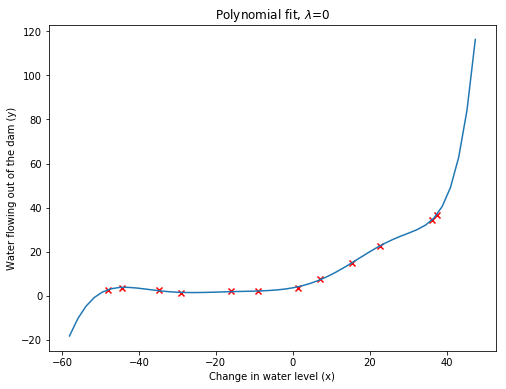

In [16]:
cls = linearRegression()
l = 0
p = 9
x_poly, x_mean, x_std = cls.feature_normalize(cls.poly_features(X,p))
opt_theta = cls.fit(np.ones(p), x_poly, Y, l)
plot_x = np.linspace(X.min() - 10, X.max() + 10)
plt.figure(figsize = (8,6))
plt.scatter(X,Y,marker = 'x', color = 'red')
plt.plot(plot_x,
         cls.hypothesis(opt_theta,(cls.poly_features(np.reshape(plot_x,(len(plot_x),1)),p) - x_mean) / x_std))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial fit, $\lambda$={0}'.format(l))
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 55
         Function evaluations: 96
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 100
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 141
   

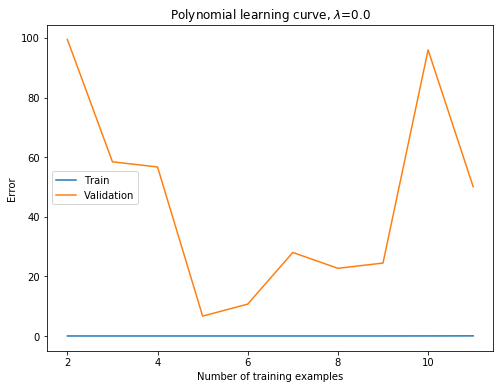

In [17]:
cls = linearRegression()
cost_data = []
l = 0.0
for i in range(2,X.shape[0]):
    subx = (cls.poly_features(X[:i],p) - x_mean) / x_std
    suby = Y[:i]
    opt_theta = cls.fit(np.ones(p), subx, suby, l)
    cost_train = cls.cost_function(opt_theta, subx, suby, l)
    cost_val = cls.cost_function(opt_theta, (cls.poly_features(Xval,p) - x_mean) / x_std, Yval, l)
    cost_data.append((i, cost_train, cost_val))
i, train, cv = zip(*cost_data)

plt.figure(figsize = (8,6))
plt.plot(i, train, label = "Train")
plt.plot(i, cv, label = "Validation")
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial learning curve, $\lambda$={0}'.format(l))
plt.legend()
plt.show()

### 3.2 Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 21
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 26
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 34
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 29
         Function evaluations: 53
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 8.754387
         Iterations: 35
         Function evaluations: 61
  

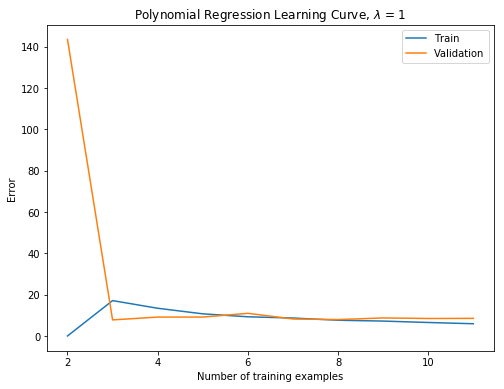

In [18]:
cls = linearRegression()
cost_data = []
l = 1
for i in range(2,X.shape[0]):
    subx = (cls.poly_features(X[:i],p) - x_mean) / x_std
    suby = Y[:i]
    opt_theta = cls.fit(np.ones(p), subx, suby, l)
    cost_train = cls.cost_function(opt_theta, subx, suby, l)
    cost_val = cls.cost_function(opt_theta, (cls.poly_features(Xval,p) - x_mean) / x_std, Yval, l)
    cost_data.append((i, cost_train, cost_val))
i, train, cv = zip(*cost_data)

plt.figure(figsize = (8,6))
plt.plot(i, train, label = "Train")
plt.plot(i, cv, label = "Validation")
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial Regression Learning Curve, $\lambda$ = {0}'.format(l))
plt.legend()
plt.show()

### 3.3 Selecting $\lambda$ using a cross validation set

Optimization terminated successfully.
         Current function value: 0.028892
         Iterations: 695
         Function evaluations: 1324
         Gradient evaluations: 1324
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 298
         Function evaluations: 563
         Gradient evaluations: 563
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 330
         Function evaluations: 622
         Gradient evaluations: 622
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 150
         Function evaluations: 295
         Gradient evaluations: 295
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 114
         Function evaluations: 212
         Gradient evaluations: 212
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 76
         Function e

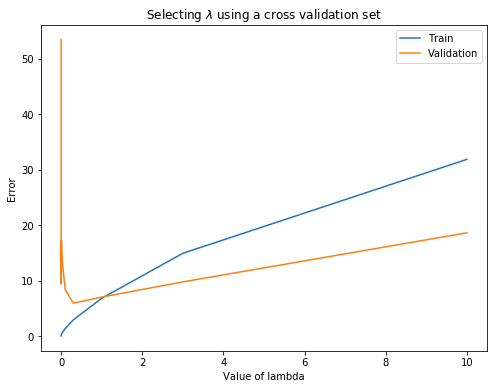

In [19]:
cls1 = linearRegression()
costs = []
l = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3,10]
p = 9
x_poly, x_mean, x_std = cls.feature_normalize(cls.poly_features(X,p))
for item in l:
    opt_theta = cls1.fit(np.ones(p), x_poly, Y, item)
    cost_train = cls1.cost_function(opt_theta, x_poly, Y, item)
    cost_val = cls1.cost_function(opt_theta, (cls1.poly_features(Xval,p) - x_mean) / x_std, Yval, item)
    costs.append((item, cost_train, cost_val))
item, train, cv = zip(*costs)

plt.figure(figsize = (8,6))
plt.plot(item, train, label = "Train")
plt.plot(item, cv, label = "Validation")
plt.xlabel('Value of lambda')
plt.ylabel('Error')
plt.title('Selecting $\lambda$ using a cross validation set')
plt.legend()
plt.show()